# doğrusal regresyon modeli

In [11]:
import pandas as pd
df=pd.read_csv("/content/Advertising.csv")
df=df.iloc[:,1:len(df)]
df.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


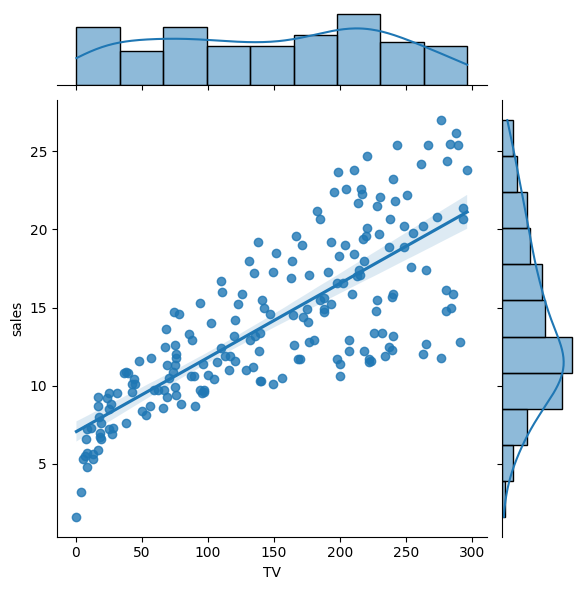

In [13]:
import seaborn as sns
sns.jointplot(x="TV",y="sales",data=df,kind="reg");

In [14]:
from sklearn.linear_model import  LinearRegression

In [17]:
#bağımsız değişken
X=df[["TV"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [18]:
#bağımlı değişken
y=df[["sales"]]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [19]:
reg=LinearRegression()

In [20]:
model=reg.fit(X,y)

In [21]:
model

LinearRegression()

In [22]:
str(model)

'LinearRegression()'

In [23]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [24]:
model.intercept_

array([7.03259355])

In [25]:
model.coef_

array([[0.04753664]])

In [26]:
#rkare
model.score(X,y)

0.611875050850071

# **tahmin**

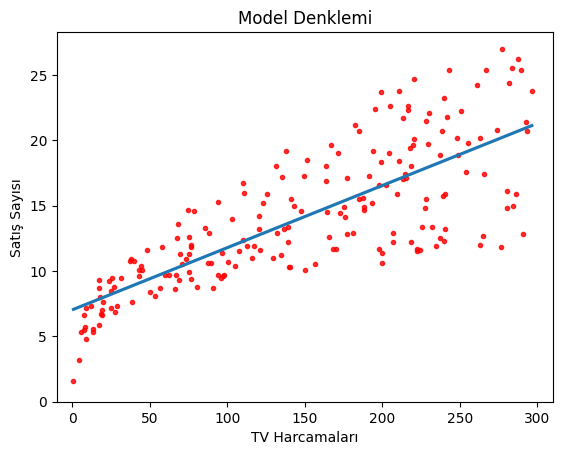

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.regplot(x=df["TV"], y=df["sales"], ci=None, scatter_kws={'color': 'r', 's': 9})

g.set_title("Model Denklemi")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()


In [38]:
yeni_veri=[[5],[10],[15]]

In [41]:
model.predict(yeni_veri)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.27027675],
       [7.50795995],
       [7.74564316]])

# artıklar ve makine öğrenmesindeki önemi

## MSE=hata karaler ortalAması
## RMSE=hata kareler ortalmasının karekökü

In [47]:
gercek_y=y[0:10]

In [48]:
tahmin_edilen_y=pd.DataFrame(model.predict(X)[0:10])

In [49]:
hatalar=pd.concat([gercek_y,tahmin_edilen_y],axis=1)

In [53]:
hatalar.columns=["gercek_y","tahmin_edilen_y"]
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [55]:
hatalar["hata"]=hatalar["gercek_y"]-hatalar["tahmin_edilen_y"]
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [56]:
hatalar["hata_kareler"]=hatalar["hata"]**2
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [58]:
import numpy as np

np.mean(hatalar["hata_kareler"])


9.290350329638102